In [11]:
'''Importing Basic modules'''
import pandas as pd
import numpy as np
from scipy import stats

'''Customize visualization Seaborn and matplotlib visualization'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

'''plotly visualization'''
import plotly.offline as py
from plotly.offline import iplot,init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [12]:
df_import = pd.read_csv('2018-2010_import.csv')
df_export = pd.read_csv('2018-2010_export.csv')

In [13]:
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    return summary

In [14]:
description(df_export)

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,HSCode,int64,0,98,2,3,4
1,Commodity,object,0,98,MEAT AND EDIBLE MEAT OFFAL.,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...
2,value,float64,14038,10687,0.18,0.0,12.48
3,country,object,0,248,AFGHANISTAN TIS,AFGHANISTAN TIS,AFGHANISTAN TIS
4,year,int64,0,9,2018,2018,2018


In [15]:
description(df_import)

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,HSCode,int64,0,98,5,7,8
1,Commodity,object,0,98,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...
2,value,float64,11588,9015,0.0,12.38,268.6
3,country,object,0,242,AFGHANISTAN TIS,AFGHANISTAN TIS,AFGHANISTAN TIS
4,year,int64,0,9,2018,2018,2018


In [16]:
df_import = df_import.dropna()
df_import['country'] = df_import['country'].replace({'U S A': 'USA'})
df_import = df_import.reset_index(drop=True)

df_export = df_export.dropna()
df_export['country'] = df_export['country'].replace({'U S A': 'USA'})
df_export = df_export.reset_index(drop=True)

# Exploratory data analysis

In [17]:
df_import.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",8.32,AFGHANISTAN TIS,2018


In [18]:
exp_year

,Export,Growth Rate(E)
year,,
2010,249801.18,NaN
2011,305948.28,0.224767
2012,300384.32,-0.018186
2013,314388.61,0.046621
2014,310321.02,-0.012938
2015,262274.30,-0.154829
2016,275835.27,0.051705
2017,303507.85,0.100323
2018,330058.64,0.087480


In [19]:
'''Converting dataset in year wise'''
exp_year = df_export.groupby('year').agg({'value' : 'sum'})
exp_year = exp_year.rename(columns = {'value':'Export'})
imp_year = df_import.groupby('year').agg({'value': 'sum'})
imp_year = imp_year.rename(columns={'value':'Import'})

''' calculating the growth of export and import'''
exp_year['Growth Rate(E)'] = exp_year.pct_change()
imp_year['Growth Rate(I)'] = imp_year.pct_change()

'''Calculating trade defict'''
total_year = pd.concat([exp_year,imp_year],axis=1)
total_year['Trade Deficit'] = exp_year.Export - imp_year.Import

bold('** Export/Import and Trade Balance of India')
display(total_year)
bold('** Descriptive statistics')
display(total_year.describe())

** Export/Import and Trade Balance of India

,Export,Growth Rate(E),Import,Growth Rate(I),Trade Deficit
year,,,,,
2010,249801.18,NaN,369762.25,NaN,-119961.07
2011,305948.28,0.224767,489311.81,0.323315,-183363.53
2012,300384.32,-0.018186,490730.07,0.002898,-190345.75
2013,314388.61,0.046621,450192.99,-0.082606,-135804.38
2014,310321.02,-0.012938,448026.63,-0.004812,-137705.61
2015,262274.30,-0.154829,412537.53,-0.079212,-150263.23
2016,275835.27,0.051705,384350.29,-0.068326,-108515.02
2017,303507.85,0.100323,465574.02,0.211327,-162066.17
2018,330058.64,0.087480,514071.33,0.104167,-184012.69


** Descriptive statistics

,Export,Growth Rate(E),Import,Growth Rate(I),Trade Deficit
count,9.000000,8.000000,9.000000,8.000000,9.000000
mean,294724.385556,0.040618,447172.991111,0.050844,-152448.605556
std,26318.974416,0.109777,49542.234081,0.149838,29507.365644
min,249801.180000,-0.154829,369762.250000,-0.082606,-190345.750000
25%,275835.270000,-0.014250,412537.530000,-0.071048,-183363.530000
50%,303507.850000,0.049163,450192.990000,-0.000957,-150263.230000
75%,310321.020000,0.090691,489311.810000,0.130957,-135804.380000
max,330058.640000,0.224767,514071.330000,0.323315,-108515.020000


In [20]:
'''visualization of Export and Import'''
#create trace 1
trace1 = go.Bar(
                x = total_year.index,
                y = total_year.Export,
                name = 'Export',
                marker = dict(color='rgb(55,83,109)', line = dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Export)
#create trace2
trace2 = go.Bar(
                x = total_year.index,
                y = total_year.Import,
                name = 'Import',
                marker = dict(color='rgb(26,118,255)', line = dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Import)

layout = go.Layout(hovermode = 'closest',title='Export/Import of Indian Trade from 2010 to 2018',
                      xaxis = dict(title='Year'), yaxis=dict(title='USD (Millions)'))
fig = go.Figure(data = [trace1,trace2],layout = layout)
fig.show()

In [20]:
'''Visualisation of export growth rate'''
trace1 = go.Scatter(
                    x = total_year.index,
                    y = total_year['Growth Rate(E)'],
                    name = 'Growth Rate(E)',
                    line_color = 'deepskyblue',
                    opacity = 0.8,
                    text = total_year['Growth Rate(E)'])
#create trace2
trace2 = go.Scatter(x = total_year.index,
                    y = total_year['Growth Rate(I)'],
                   name = 'Growth Rate(I)',
                   line_color = 'dimgray',
                   opacity = 0.8,
                   text = total_year['Growth Rate(I)'])
            #hovermodes can be 'closest', 'x','y' it mean which data to show when you put your cursor there
layout = go.Layout(hovermode='closest',title = 'Export/Import Growth RAte of Indian Trade from 2010 to 2018', xaxis = dict(title='year'),
                  yaxis=dict(title='Growthrate'))

fig = go.Figure(data = [trace1, trace2],layout = layout)
fig.show()

In [26]:
'''Visualization of Export/ Import and Trade Deficit'''
trace1 = go.Bar(x = total_year.index,
               y = total_year.Export,
               name = 'Export',
               marker = dict(color = 'rgb(55,83,109)'))
#trace2
trace2 = go.Bar(x = total_year.index,
               y = total_year.Import,
               name = 'Import',
               marker = dict(color = 'rgb(26,11,255)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = total_year.Import)
trace3 = go.Bar(x = total_year.index,
               y = total_year['Trade Deficit'],
               name = 'Trade Deficit',
               marker = dict(color = 'crimson', line = dict(color='rgb(0,0,0)',width = 1.5)),
               text = total_year['Trade Deficit'])


layout = go.Layout(hovermode = 'closest', title = 'Export/Import and Trade Deficit of Indian Trade form 2010 to 2018',
                  xaxis = dict(title = 'Year'),yaxis = dict(title = 'USD (millions)'))

fig = go.Figure(data = [trace1, trace2, trace3], layout = layout)
fig.show()

# Commodity Wise Analysis

In [27]:
'''Commdity export/Import count'''
print('Total number of Export Commdity:', df_export['Commodity'].nunique())
print('Total number of Import Commdity:', df_import['Commodity'].nunique())

Total number of Export Commdity: 98
Total number of Import Commdity: 98


In [29]:
'''Let's count the most importing and exporting commodities'''
bold("**Most Exporting commoditites (In Numbers) from 2010 to 2018**")
display(pd.DataFrame(df_export['Commodity'].value_counts().head(20)))
bold('** Most Importing commodities (In Numbers) for 2010 to 2018')
display(pd.DataFrame(df_import['Commodity'].value_counts().head(20)))

**Most Exporting commoditites (In Numbers) from 2010 to 2018**

,Commodity
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1882
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",1878
PHARMACEUTICAL PRODUCTS,1876
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",1849
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.",1817
PLASTIC AND ARTICLES THEREOF.,1809
ARTICLES OF IRON OR STEEL,1797
OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLOTHING AND WORN TEXTILE ARTICLES; RAGS,1791
"VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.",1788
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, KNITTED OR CORCHETED.",1741


** Most Importing commodities (In Numbers) for 2010 to 2018

,Commodity
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",1576
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1504
IRON AND STEEL,1378
PLASTIC AND ARTICLES THEREOF.,1295
ALUMINIUM AND ARTICLES THEREOF.,1289
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",1203
COPPER AND ARTICLES THEREOF.,1117
ARTICLES OF IRON OR STEEL,1099
WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,1072
RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND LEATHER,1043


In [31]:
'''Coverting dataset in commodity wise'''
exp_comm = df_export.groupby('Commodity').agg({'value':'sum'})
exp_comm = exp_comm.sort_values(by = 'value', ascending = False)
exp_comm = exp_comm[:20]

imp_comm = df_import.groupby('Commodity').agg({'value':'sum'})
imp_comm = imp_comm.sort_values(by = 'value', ascending = False)
imp_comm = imp_comm[0:20]

In [39]:
'''Visualization of Export/Import commodity wise'''
def bar_plot(x,y,xlabel,ylabel,label,color):
    global ax
    font_size = 30
    title_size = 60
    plt.rcParams['figure.figsize'] = (40,30)
    ax = sns.barplot(x,y,palette=color)
    ax.set_xlabel(xlabel = xlabel, fontsize = font_size)
    ax.set_ylabel(ylabel=ylabel, fontsize = font_size)
    ax.set_title(label = label, fontsize = title_size)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.show()

C:\Users\Axelrod\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



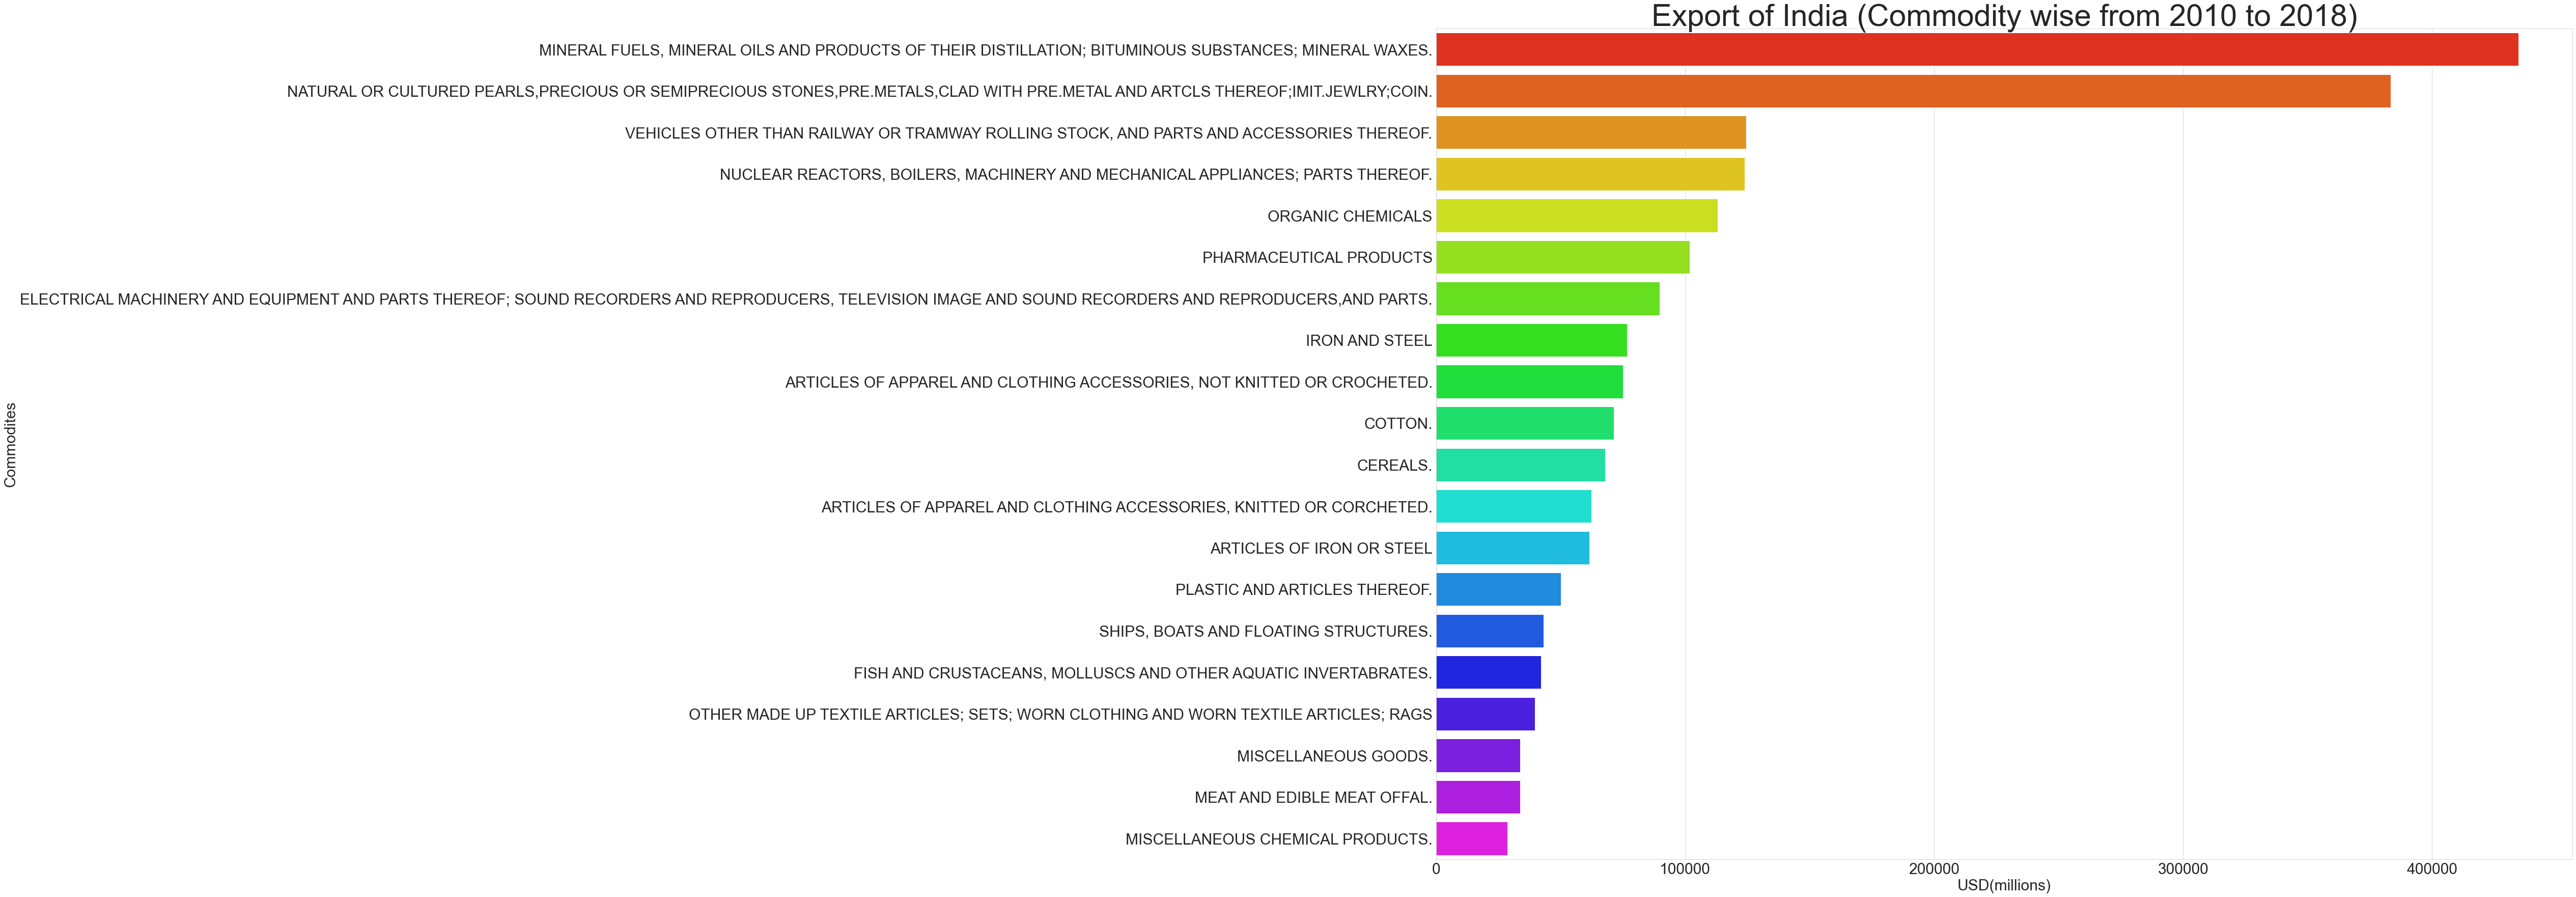

C:\Users\Axelrod\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



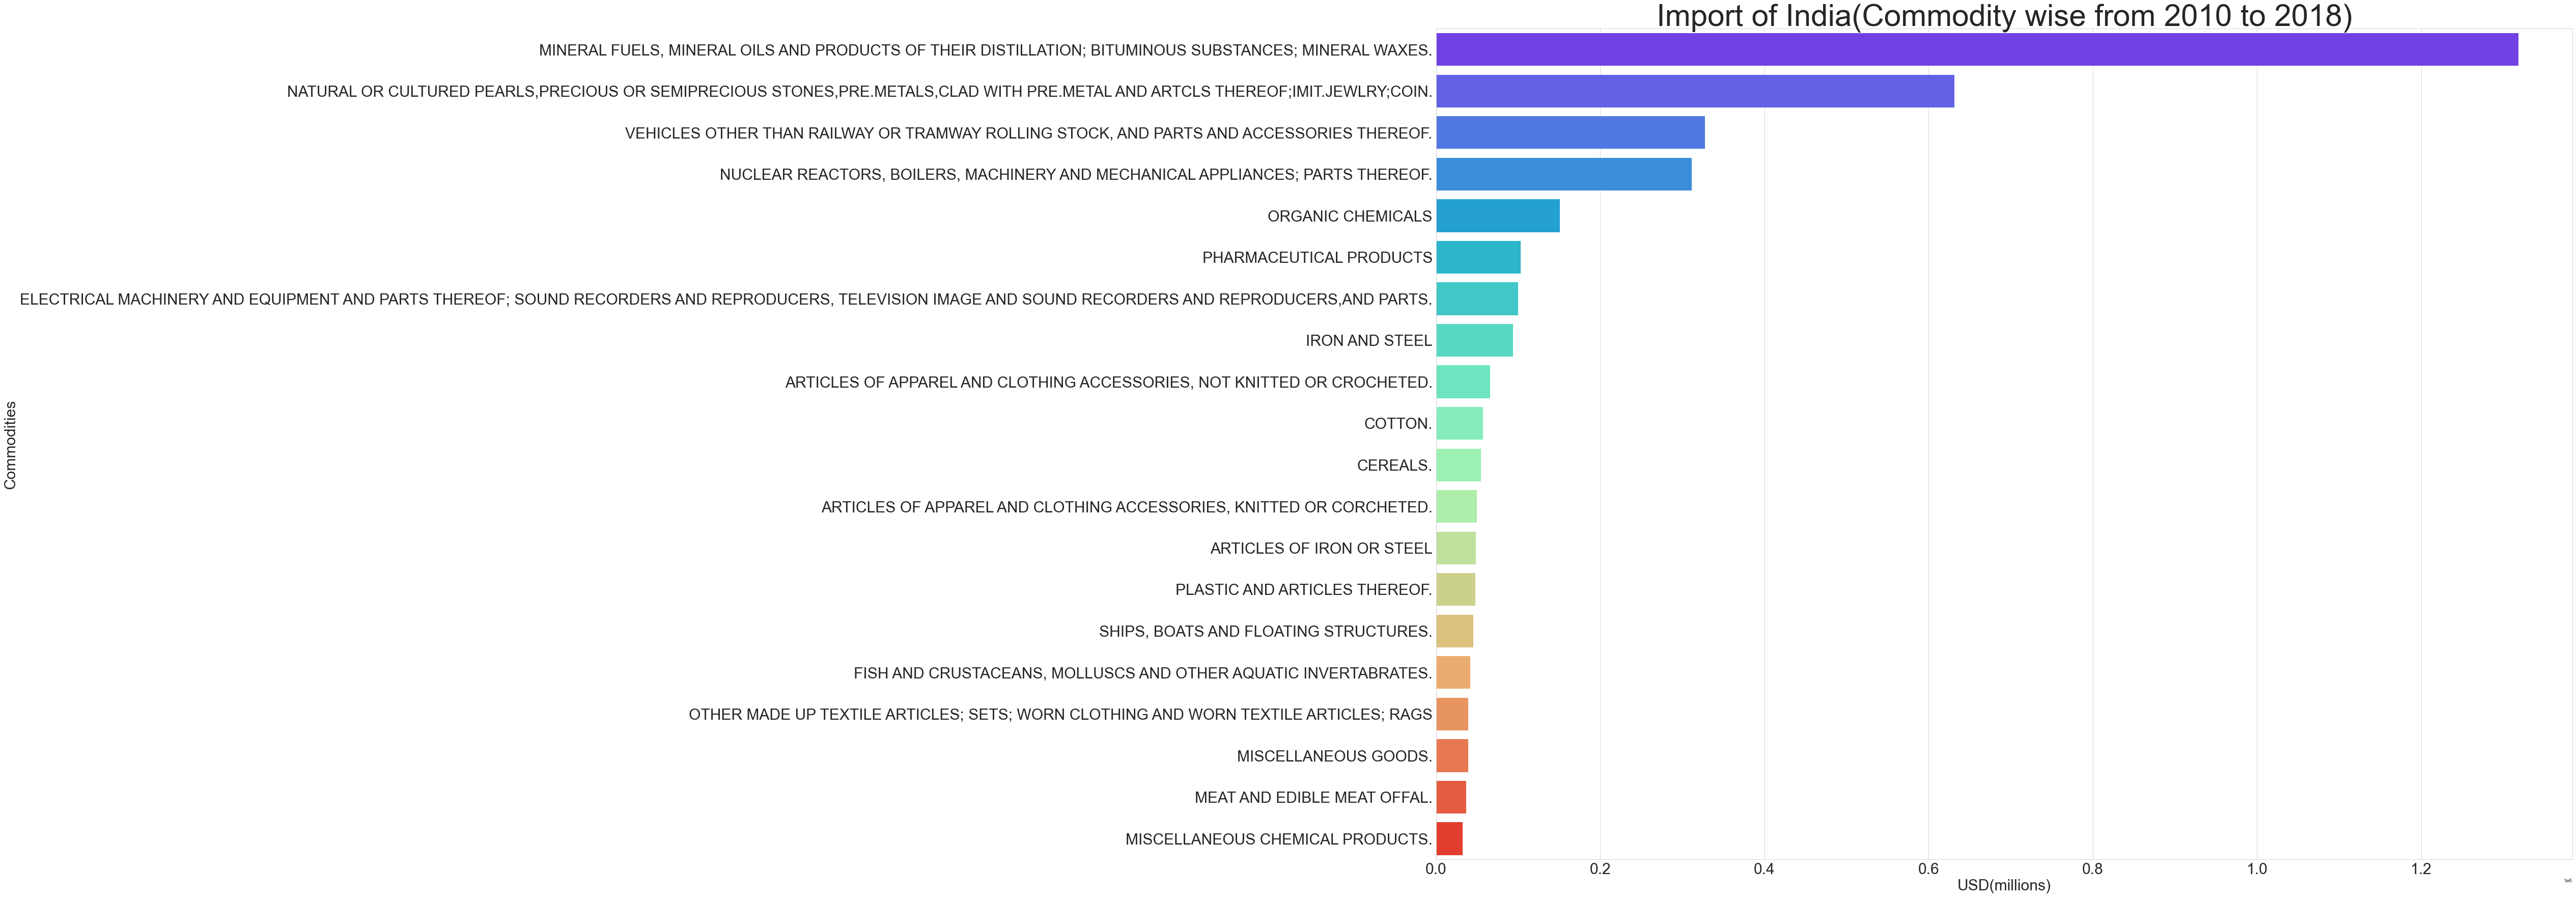

In [40]:
bar_plot(exp_comm.value, exp_comm.index,'USD(millions)','Commodites','Export of India (Commodity wise from 2010 to 2018)','gist_rainbow')
bar_plot(imp_comm.value, exp_comm.index, 'USD(millions)','Commodities','Import of India(Commodity wise from 2010 to 2018)','rainbow')

In [44]:
'''Create pivot table of export/import (commodity wise)'''
exp_comm_table = pd.pivot_table(df_export, values='value', index = 'Commodity',columns = 'year')
imp_comm_table = pd.pivot_table(df_import, values = 'value',index='Commodity',columns = 'year')

bold('**Commodity composition of Exports**')
display(exp_comm_table.sample(n=5))
bold('**ecommodity composition of imports**')
display(imp_comm_table.sample(n=5))

**Commodity composition of Exports**

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Commodity,,,,,,,,,
IRON AND STEEL,42.242130,45.613571,46.758497,52.107853,48.244667,32.118129,49.616114,63.888239,54.422737
"PAPER AND PAPERBOARD; ARTICLES OF PAPER PULP, OF PAPER OR OF PAPERBOARD.",4.473743,4.652103,5.103263,5.365897,5.903231,5.812893,6.198254,7.369948,10.101421
OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLOTHING AND WORN TEXTILE ARTICLES; RAGS,16.151458,20.478135,20.711538,22.284800,22.996287,22.817015,24.005000,24.817327,25.033905
GLASS AND GLASSWARE.,2.432156,3.199281,3.341818,3.671092,3.834153,3.952809,3.720568,3.866989,5.243702
CLOCKS AND WATCHES AND PARTS THEREOF.,0.423719,0.594720,0.619690,0.662326,0.721797,0.767953,0.683538,0.590368,0.755564


**ecommodity composition of imports**

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Commodity,,,,,,,,,
"UMBRELLAS, SUN UMBRELLAS, WALKING-STICKS, SEAT-STICKS, WHIPS,RIDING-CROPS AND PARTS THEREOF.",0.358750,0.784857,0.708438,0.677647,0.821515,0.677692,0.837241,1.099062,1.104412
"SOAP, ORGANIC SURFACE-ACTIVE AGENTS, WASHING PREPARATIONS, LUBRICATING PREPARATIONS, ARTIFICIAL WAXES, PREPARED WAXES, POLISHING OR SCOURING PREP.",4.530000,5.837126,6.652771,7.343077,8.093735,6.983579,8.093210,9.881220,10.503182
TIN AND ARTICLES THEREOF.,5.697500,5.777187,6.540385,9.486538,8.895652,7.198148,6.716923,9.417308,8.397407
NICKEL AND ARTICLES THEREOF.,15.338261,16.079412,20.717755,19.257234,25.213818,16.623279,10.431321,11.094912,14.500196
SUGARS AND SUGAR CONFECTIONERY.,11.985357,2.600893,11.078103,10.099149,14.605532,22.823509,20.822075,16.939677,10.459231


In [45]:
df_export.head(5)

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


# Trend of the most exporting Goods(in values) from 2010 to 2018


**Trend of hte Most Exporting Goods(in Values) From 2010 to 2018**

value    434594.81
Name: MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES., dtype: float64

Text(0.5, 1.0, 'Trend of Petroleum prducts')

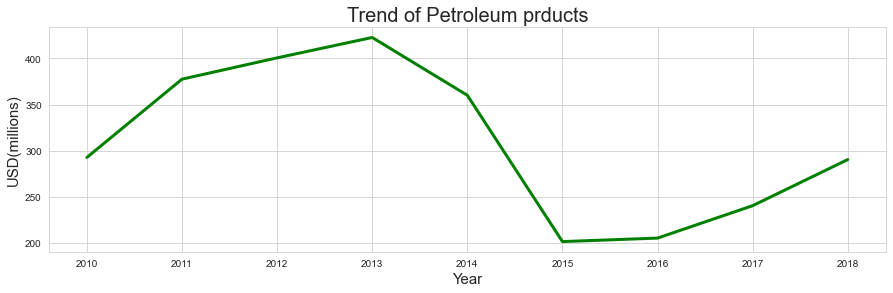

In [59]:
bold('**Trend of hte Most Exporting Goods(in Values) From 2010 to 2018**')
plt.figure(figsize=(15,19))

plt.subplot(411)
display(exp_comm.iloc[0])
g = exp_comm_table.loc["MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES."].plot(color='green', linewidth=3)
g.set_ylabel('USD(millions)',fontsize=15)
g.set_xlabel('Year', fontsize=15)
g.set_title('Trend of Petroleum prducts', size=20)

**Trend of the Most Exporting Goods(In Values) From 2010 to 2018**

Text(0.5, 1.0, 'Trend of Petroleum products')

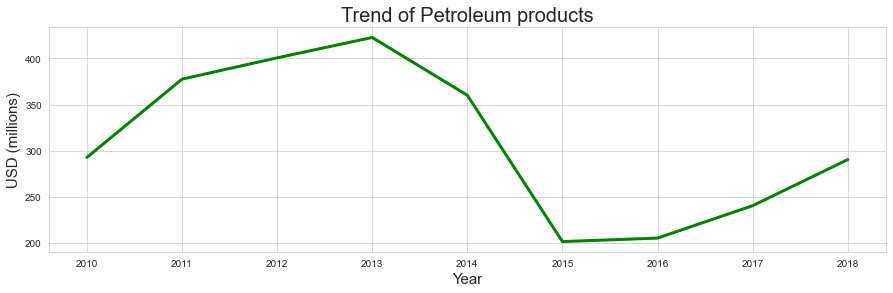

In [57]:


bold('**Trend of the Most Exporting Goods(In Values) From 2010 to 2018**')
plt.figure(figsize=(15,19))
 
plt.subplot(411)
g = exp_comm_table.loc["MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES."].plot(color='green', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_title('Trend of Petroleum products', size = 20)

In [63]:
exp_comm_table.loc["MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES."]

year
2010    292.711370
2011    377.577632
2012    400.679871
2013    422.779608
2014    360.124625
2015    201.493355
2016    205.288228
2017    240.433187
2018    290.425636
Name: MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES., dtype: float64

In [70]:
exp_comm.iloc[0,:]

value    434594.81
Name: MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES., dtype: float64

In [71]:
exp_comm['value']

Commodity
MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.                                                     434594.81
NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.                            383341.86
VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.                                                                  124502.75
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.                                                                            123810.69
ORGANIC CHEMICALS                                                                                                                                         113008.98
PHARMACEUTICAL PRODUCTS                                                                                                                                   101792.69
ELECTR